# Concerns:
- Separators bad lol
- REDO ExtractDocumentContentFunction with lemmatization and stop word
- Word Frequency:
    - Statistical testing?
    - In GRS, Muslim religious texts (how much of a Muslim clerics' text to classify as a Jihad or not)
    - First identifies with a baseline Jihad with similarity to Muslim clerics texts
- Can compare each pope's documents to the documents of the First and Second Vatican Council
    - Are these pope's documents more similar to the First or Second Vatican council (using some ML)
    - Drift and backsliding
- Paternalism (vs. more humanistic over time)

In [1]:
### Packages ###
import os
import numpy as np

from utils.Main import *
from utils.Plots import *
from utils.Council import *
from utils.Encylicals import *

# WebScrape

In [ ]:
## Save Encylicals ###
SaveEnclylicals()

Getting encylical links:
Found 4 encyclicals for francesco
Found 3 encyclicals for benedict_xvi
Found 14 encyclicals for john_paul_ii
Found 7 encyclicals for paul_vi
Found 8 encyclicals for john_xxiii
Found 40 encyclicals for pius_xii
Found 25 encyclicals for pius_xi
Found 12 encyclicals for benedict_xv
Found 16 encyclicals for pius_x


In [3]:
## Save Vatican Council Documents
SaveVaticanDocuments("en")

Getting Vatican Council documents:

Processing Vatican I documents:
Failed to retrieve https://www.vatican.va/archive/hist_councils/i-vatican-council/documents/vat-i_const_18700424_dei-filius_en.html. Status code: 404
Failed to retrieve https://www.vatican.va/archive/hist_councils/i-vatican-council/documents/vat-i_const_18700718_pastor-aeternus_en.html. Status code: 404

Processing Vatican II documents:
Successfully processed: Vat Ii_Const_19651118_Dei Verbum_En
Successfully processed: Vat Ii_Const_19641121_Lumen Gentium_En
Successfully processed: Vat Ii_Const_19631204_Sacrosanctum Concilium_En
Successfully processed: Vat Ii_Const_19651207_Gaudium Et Spes_En
Successfully processed: Vat Ii_Decl_19651028_Gravissimum Educationis_En
Successfully processed: Vat Ii_Decl_19651028_Nostra Aetate_En
Successfully processed: Vat Ii_Decl_19651207_Dignitatis Humanae_En
Successfully processed: Vat Ii_Decree_19651207_Ad Gentes_En
Successfully processed: Vat Ii_Decree_19651207_Presbyterorum Ordinis_En


# Load Text

In [4]:
RootDirectory = "/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Data"
df_Encyclicals = LoadEncyclicals(os.path.join(RootDirectory, "Encylicals"))
df_Councils = LoadCouncils(os.path.join(RootDirectory, "Councils"))


In [5]:
df_Councils

,Council,Title,DocumentText
0,2,ad-gentes,DECREEAD GENTESON THE MISSION ACTIVITYOF THE C...
1,2,apostolicam-actuositatem,DECREE ON THE APOSTOLATE OF THE LAITYAPOSTOLIC...
2,2,christus-dominus,DECREE CONCERNINGTHE PASTORAL OFFICE OF BISHOP...
3,2,dei-verbum,1. Hearing the word of God with reverence and ...
4,2,dignitatis-humanae,AR-BE-CS-DE-EN-ES-FR-IT-HU-LA-LV-PT-SW-ZHDECLA...
5,2,gaudium-et-spes,PASTORAL CONSTITUTIONON THE CHURCH IN THEMODER...
6,2,gravissimum-educationis,DECLARATION ON CHRISTIAN EDUCATIONGRAVISSIMUM ...
7,2,inter-mirifica,DECREE ON THE MEDIA OF SOCIAL COMMUNICATIONSIN...
8,2,lumen-gentium,THE MYSTERY OF THE CHURCH\n\n2. The eternal Fa...
9,2,nostra-aetate,AR-BE-CS-DE-EN-ES-FR-IT-HE-HR-HU-LA-LV-PT-SW-Z...


In [ ]:
df_Encyclicals

,PopeName,encyclical,DocumentText,DocumentDate,PreVaticanII
0,leo_xiii,magni-nobis,"2. We, on our part, have not delayed to fulfil...",1889-03-07,True
1,leo_xiii,vi-e-ben-noto,2. It is easy to imagine what reasons We have ...,1887-09-20,True
2,leo_xiii,diuturnum,"2. For a long time, indeed, pains have been ta...",1881-06-29,True
3,leo_xiii,supremi-apostolatus-officio,2. It has always been the habit of Catholics i...,1883-09-01,True
4,leo_xiii,inimica-vis,2. Our predecessors in the Roman pontificate h...,1892-12-08,True
...,...,...,...,...,...
210,pius_xii,redemptoris-nostri-cruciatus,"1. The passion of Our Redeemer, rendered prese...",1949-04-15,True
211,pius_xii,sempiternus-rex-christus,"Given at St. Peter's Basilica, Rome, on the 8t...",1951-09-08,True
212,pius_xii,sacra-virginitas,1. Holy virginity and that perfect chastity wh...,1954-03-25,True
213,pius_xii,le-pelerinage-de-lourdes,"2. We are particularly pleased, therefore, to ...",1957-07-02,True


# Word Frequency

In [ ]:
### Stop Words ###
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('stopwords')
nltk.download('punkt')
CustomStopWords = {"would", "which", "should"} 
StopWordsSet = set(stopwords.words("english")).union(STOPWORDS, CustomStopWords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simondn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/simondn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
### Get word frequency per pope ###
PopeEncyWordFrequency = GetEncylicalWordFrequency(df_input = df_Encyclicals, 
                                                  GroupByVar = "PopeName", 
                                                  StopWordsSet = StopWordsSet, 
                                                  TopNInput = 20)

### Get word frequency for popes before Vatican II and after Vatican II ###
CouncilEncyWordFrequency = GetEncylicalWordFrequency(df_input = df_Encyclicals, 
                                                     GroupByVar = "PreVaticanII", 
                                                     StopWordsSet = StopWordsSet, 
                                                     TopNInput = 20)
CouncilEncyWordFrequency.columns = ["Pre_VaticanII_Popes", "Post_VaticanII_Popes"]

In [9]:
print(CouncilEncyWordFrequency)

           Pre_VaticanII_Popes  Post_VaticanII_Popes
church               13.365912              8.993925
christ                8.122565              7.660394
catholic              6.524467              0.000000
faith                 6.194281              9.216180
christian             5.916925              4.252482
people                4.847124              6.267595
divine                4.781087              0.000000
great                 4.602787              0.000000
thing                 4.569768              0.000000
truth                 4.272601              8.193806
power                 4.265997              0.000000
religion              4.213168              0.000000
brother               3.777323              0.000000
authority             3.691475              0.000000
order                 3.638645              0.000000
right                 3.605626              3.111572
state                 3.585815              0.000000
human                 3.566004              9.

# Text Comparison

## Pre/Post Vatican II

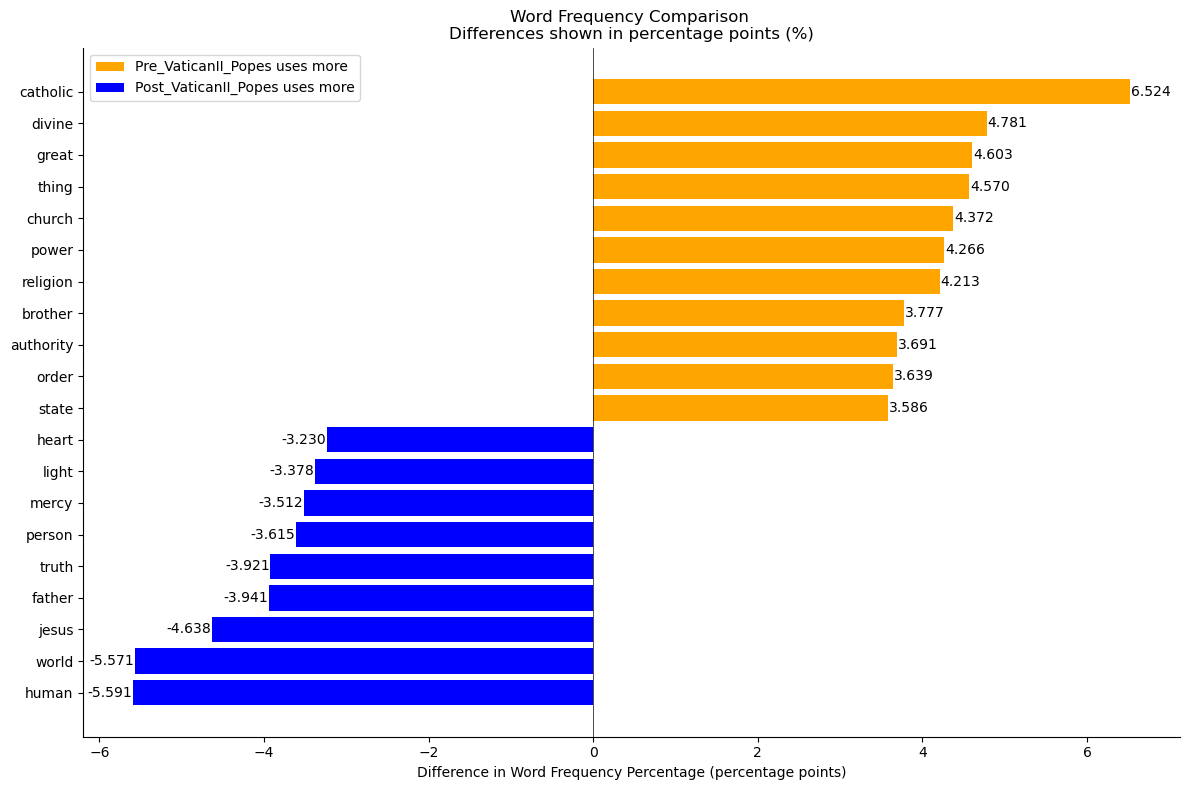

In [ ]:
fig, ax = DivergingBarChartFunction(CouncilEncyWordFrequency, "Pre_VaticanII_Popes", "Post_VaticanII_Popes", NWords=20)

## Between Popes

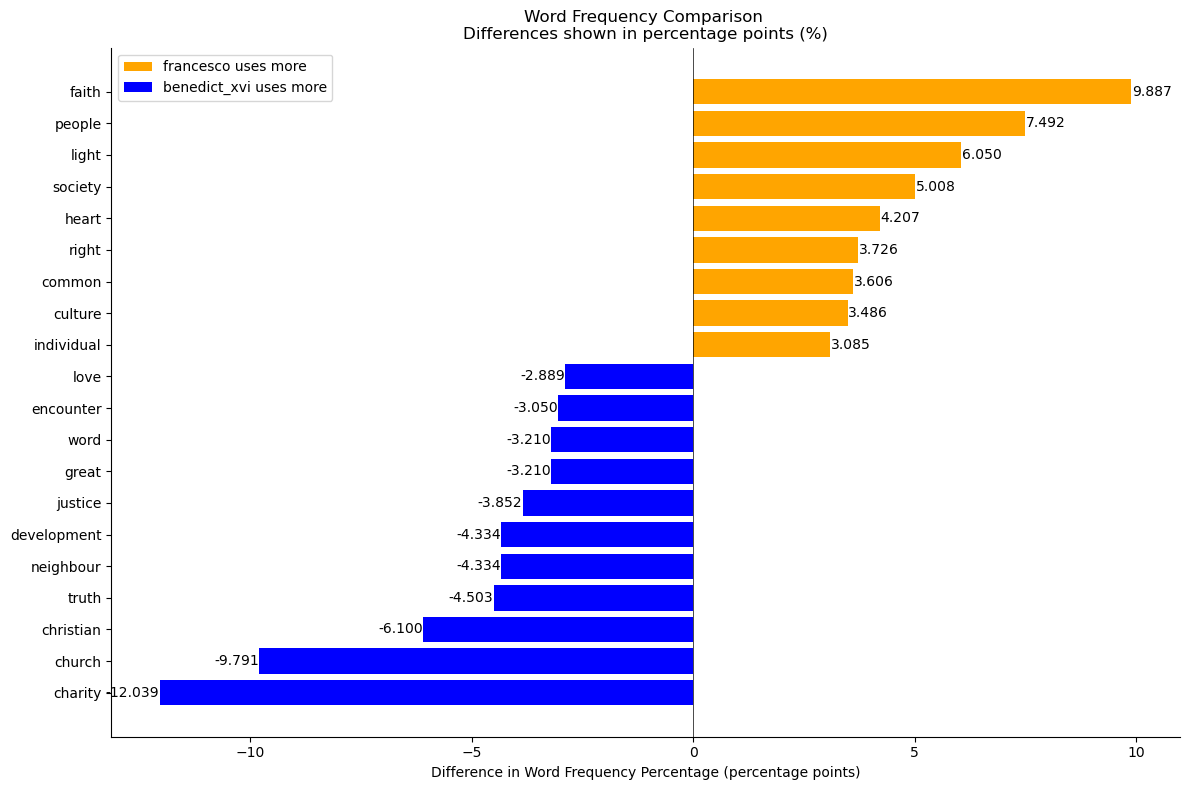

In [11]:
fig, ax = DivergingBarChartFunction(PopeEncyWordFrequency, "francesco", "benedict_xvi", NWords=20)


# Topic Modelling

## Pre/post Vatican II

In [ ]:
# For Vatican II comparison
VaticanCouncilTopicModellingResults = AnalyzeVaticanIITopics(df_Encyclicals, NumTopics=5, stopwords=StopWordsSet)
VaticanCouncilTopicModellingResults_Comparison = CompareTopicResults(VaticanCouncilTopicModellingResults)
VaticanCouncilTopicModellingResults_Comparison

,Pre-Vatican II_Topics,Pre-Vatican II_Examples,Pre-Vatican II_Coherence,Post-Vatican II_Topics,Post-Vatican II_Examples,Post-Vatican II_Coherence
0,"church, catholic, faith, christ, religion, act...",2. We shall not say anything new; for facts ha...,0.236533,"human, mercy, christ, church, people, truth, f...",1. The Church professes her faith in the Holy ...,0.339144
1,"church, christ, sacred, peace, catholic, peopl...",2. It is unpleasant for Us again to have to sp...,0.236533,"faith, master, christ, christian, mother, hope...",1. Human Work on the Ninetieth Anniversary of ...,0.339144
2,"church, christ, christian, faith, power, catho...","2. We, on our part, have not delayed to fulfil...",0.236533,"truth, human, people, world, reason, society, ...","1. In both East and West, we may trace a journ...",0.339144
3,"church, christ, christian, great, faith, praye...",2. It is easy to imagine what reasons We have ...,0.236533,"church, christian, unity, dialogue, christ, co...",1.Ut unum sint!The call for Christian unity ma...,0.339144
4,"church, faith, christ, christian, divine, trut...",2. Our predecessors in the Roman pontificate h...,0.236533,"faith, christ, church, light, jesus, truth, pr...",1. The Church draws her life from the Eucharis...,0.339144


## Between Popes

In [ ]:
# For Vatican II comparison
PopeTopicModellingResults = AnalyzePapalTopics(df_Encyclicals, NumTopics=5, stopwords=StopWordsSet)
PopeTopicModellingResults_Comparison = CompareTopicResults(PopeTopicModellingResults)
PopeTopicModellingResults_Comparison

,leo_xiii_Topics,leo_xiii_Examples,leo_xiii_Coherence,john_paul_ii_Topics,john_paul_ii_Examples,john_paul_ii_Coherence,benedict_xv_Topics,benedict_xv_Examples,benedict_xv_Coherence,pius_x_Topics,...,pius_xi_Coherence,benedict_xvi_Topics,benedict_xvi_Examples,benedict_xvi_Coherence,paul_vi_Topics,paul_vi_Examples,paul_vi_Coherence,pius_xii_Topics,pius_xii_Examples,pius_xii_Coherence
0,"church, christ, faith, catholic, christian, re...",2. It is easy to imagine what reasons We have ...,0.291322,"mercy, human, christ, people, father, death, w...",1. The Gospel of life is at the heart of Jesus...,0.380376,"francis, order, assisi, church, christian, rel...",1. In the next place there is the personal rem...,0.325083,"church, divine, christ, thing, faith, world, p...",...,0.261892,"church, charity, truth, christian, human, neig...",,0.263105,"church, married, human, moral, marriage, husba...",2. We are delighted and consoled by this pious...,0.304731,"human, time, virginity, faith, spirit, heaven,...","2. And so, because love when it is true and de...",0.314953
1,"scripture, sacred, church, catholic, study, fa...","2. Now We, who by the help of God, and not wit...",0.291322,"church, eucharist, word, christ, jesus, spirit...",1. The Church professes her faith in the Holy ...,0.380376,"christ, church, preaching, boniface, apostle, ...","2. Here then, Venerable Brethren, is a burden ...",0.325083,"faith, catholic, modernist, religion, science,...",...,0.261892,"faith, christian, master, hope, encounter, sla...",1. âSPE SALVI facti sumusââin hope we we...,0.263105,"peace, nation, right, mankind, church, human, ...","2. Like Our immediate predecessors, We seem to...",0.304731,"peace, prayer, christian, people, brother, hea...","2. And so, aware of Our Apostolic duties, We c...",0.314953
2,"marriage, church, prayer, rosary, power, chris...","2. We, on our part, have not delayed to fulfil...",0.291322,"human, truth, church, people, reason, father, ...",,0.380376,"church, christ, christian, charity, father, ch...","2. Nevertheless, Our distress has been somewha...",0.325083,"church, world, christ, gregory, divine, order,...",...,0.261892,"truth, charity, church, human, christian, soci...",,0.263105,"church, christ, priest, celibacy, priesthood, ...",2. For if the sacred liturgy holds first place...,0.304731,"church, christ, christian, catholic, faith, di...","2. But what is more, the divine Redeemer has s...",0.314953
3,"catholic, seminary, college, study, church, cl...",2. The Spanish clergy was long renowned for th...,0.291322,"church, christian, unity, christ, council, dia...",1.Ut unum sint!The call for Christian unity ma...,0.380376,"christ, church, brother, charity, peace, fathe...",,0.325083,"church, christ, brother, catholic, venerable, ...",...,0.261892,"truth, charity, social, development, church, h...","1.Charity in truth, to which Jesus Christ bore...",0.263105,"encyclical, church, world, called, considerati...","2. It will not, therefore, come as a surprise ...",0.304731,"teaching, church, truth, authority, dogma, opi...",2. It is not surprising that such discord and ...,0.314953
4,"ghost, christ, slave, church, spirit, thing, c...",2. Meanwhile We testify to each one of You Our...,0.291322,"truth, reason, human, faith, philosophy, knowl...","1. In both East and West, we may trace a journ...",0.380376,"jerome, bible, scripture, truth, writer, book,...","2. No need to remind you, Venerable Brethren, ...",0.325083,"church, christ, thing, faith, christian, truth...",...,0.261892,"church, christian, neighbour, jesus, faith, ch...","1. âGod is love, and he who abides in love a...",0.263105,"church, moral, human, christ, nature, priest, ...",,0.304731,"study, cardinal, necessary, considered, sacred...",2. Since then it is fitting that We should com...,0.314953


# Sentiment Analysis

In [14]:
EncyclicalSentimentsDF = GetEncylicalSentiments(df_Encyclicals)

In [15]:
EncyclicalSentimentsDF

,DocumentTitle,DocumentDate,PopeName,PreVaticanII,NegativeScore,NeutralScore,PositiveScore,CompoundScore
70,inscrutabili-dei-consilio,1878-04-21,leo_xiii,True,0.103,0.706,0.191,0.9997
34,quod-apostolici-muneris,1878-12-28,leo_xiii,True,0.155,0.673,0.173,0.7850
22,aeterni-patris,1879-08-04,leo_xiii,True,0.061,0.697,0.242,1.0000
49,arcanum,1880-02-10,leo_xiii,True,0.080,0.749,0.172,1.0000
16,grande-munus,1880-09-30,leo_xiii,True,0.000,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
166,caritas-in-veritate,2009-06-29,benedict_xvi,False,0.031,0.696,0.272,1.0000
139,lumen-fidei,2013-06-29,francesco,False,0.034,0.713,0.253,1.0000
137,laudato-si,2015-05-24,francesco,False,0.141,0.780,0.079,-0.9446
138,fratelli-tutti,2020-10-03,francesco,False,0.118,0.690,0.193,1.0000


/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Code/utils/PlotSentimentAnalysis.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


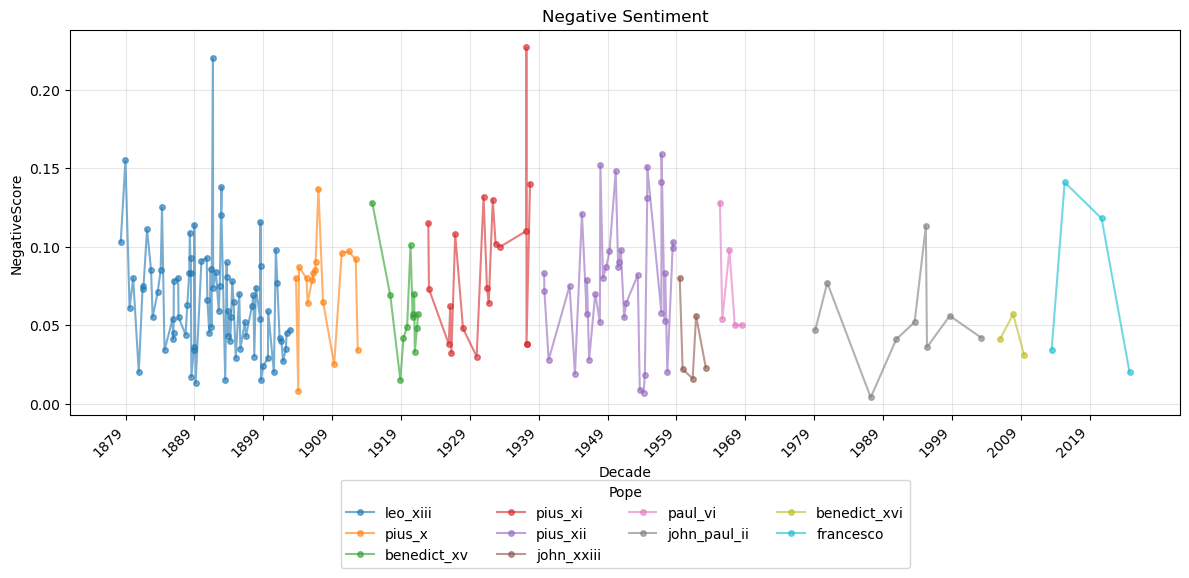

In [16]:
PlotSentimentScores(EncyclicalSentimentsDF[EncyclicalSentimentsDF["NegativeScore"] !=0], "NegativeScore")

/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Code/utils/PlotSentimentAnalysis.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


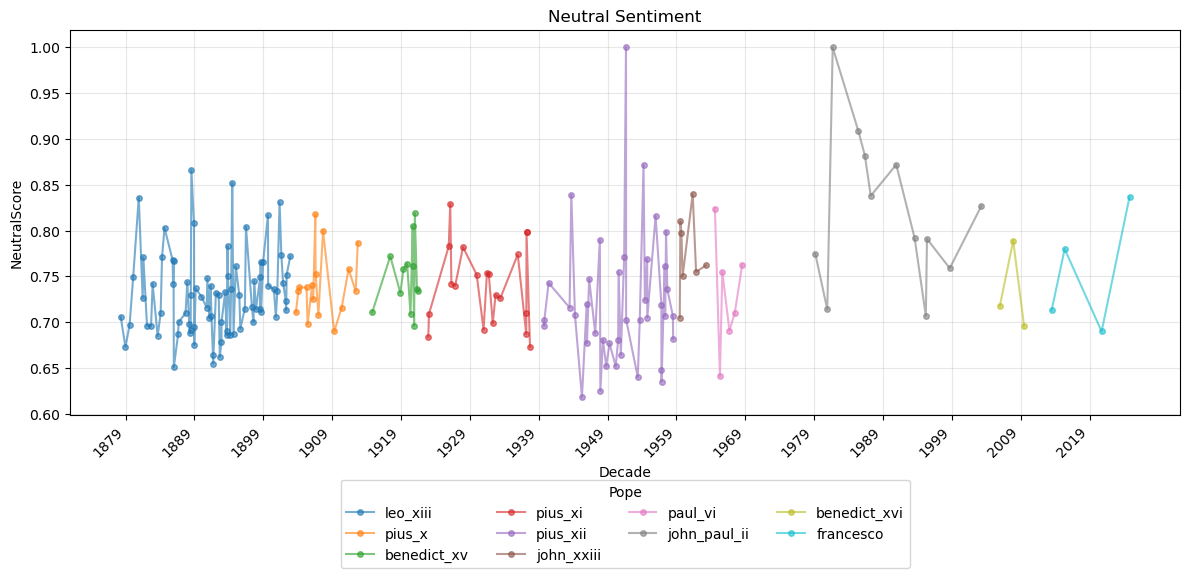

In [ ]:
PlotSentimentScores(EncyclicalSentimentsDF[EncyclicalSentimentsDF["NeutralScore"] !=0], "NeutralScore")

/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Code/utils/PlotSentimentAnalysis.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


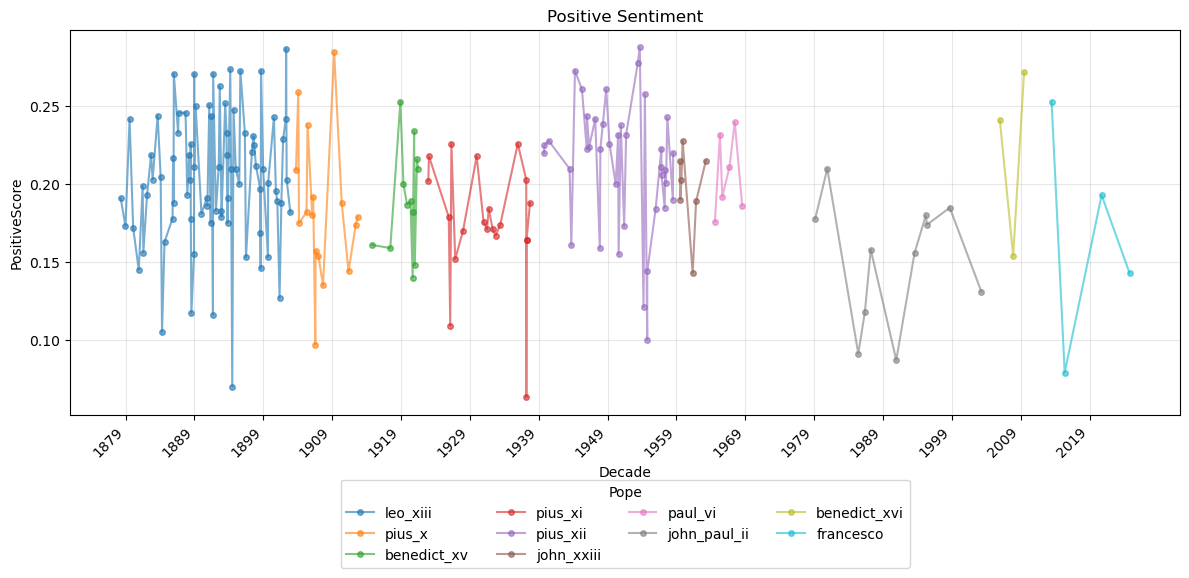

In [ ]:
PlotSentimentScores(EncyclicalSentimentsDF[EncyclicalSentimentsDF["PositiveScore"] !=0], "PositiveScore")

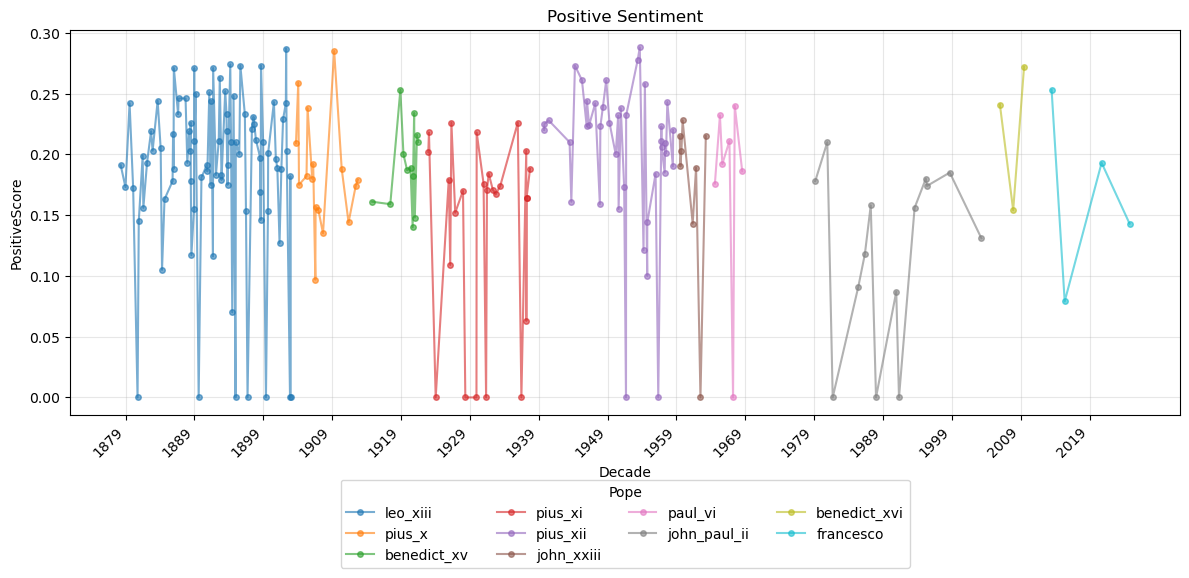

In [19]:
PlotSentimentScores(EncyclicalSentimentsDF, "PositiveScore")


# Comparison to Vatican Council Documents

In [20]:
### For now ###
df_Councils["Council"] = list(np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])+1)

### Run the analysis ###
DocumentSimilarity, PopeSimilarity = AnalyzeDocumentSimilarities(df_Councils, df_Encyclicals)


In [23]:
DocumentSimilarity

,PopeName,encyclical,Vatican1_Similarity,Vatican2_Similarity,DocumentDate
0,leo_xiii,magni-nobis,0.058028,0.110454,1889-03-07
1,leo_xiii,vi-e-ben-noto,0.125358,0.171335,1887-09-20
2,leo_xiii,diuturnum,0.180492,0.287398,1881-06-29
3,leo_xiii,supremi-apostolatus-officio,0.117167,0.175802,1883-09-01
4,leo_xiii,inimica-vis,0.090935,0.135473,1892-12-08
...,...,...,...,...,...
210,pius_xii,redemptoris-nostri-cruciatus,0.101754,0.150683,1949-04-15
211,pius_xii,sempiternus-rex-christus,0.043097,0.038503,1951-09-08
212,pius_xii,sacra-virginitas,0.052887,0.079662,1954-03-25
213,pius_xii,le-pelerinage-de-lourdes,0.026872,0.044800,1957-07-02


In [21]:
PopeSimilarity

,PopeName,Vatican1_Similarity,Vatican2_Similarity,Vatican1_StdDev,Vatican2_StdDev
0,benedict_xv,0.135493,0.196858,0.052054,0.078675
1,benedict_xvi,0.207239,0.271602,0.084595,0.108248
2,francesco,0.205522,0.261396,0.098783,0.142772
3,john_paul_ii,0.167614,0.211243,0.112774,0.154603
4,john_xxiii,0.079743,0.110818,0.051538,0.078134
5,leo_xiii,0.126047,0.187860,0.065971,0.097376
6,paul_vi,0.120279,0.180114,0.087977,0.131137
7,pius_x,0.147330,0.210756,0.069070,0.094331
8,pius_xi,0.116310,0.161575,0.089105,0.127828
9,pius_xii,0.112324,0.154876,0.075778,0.091998


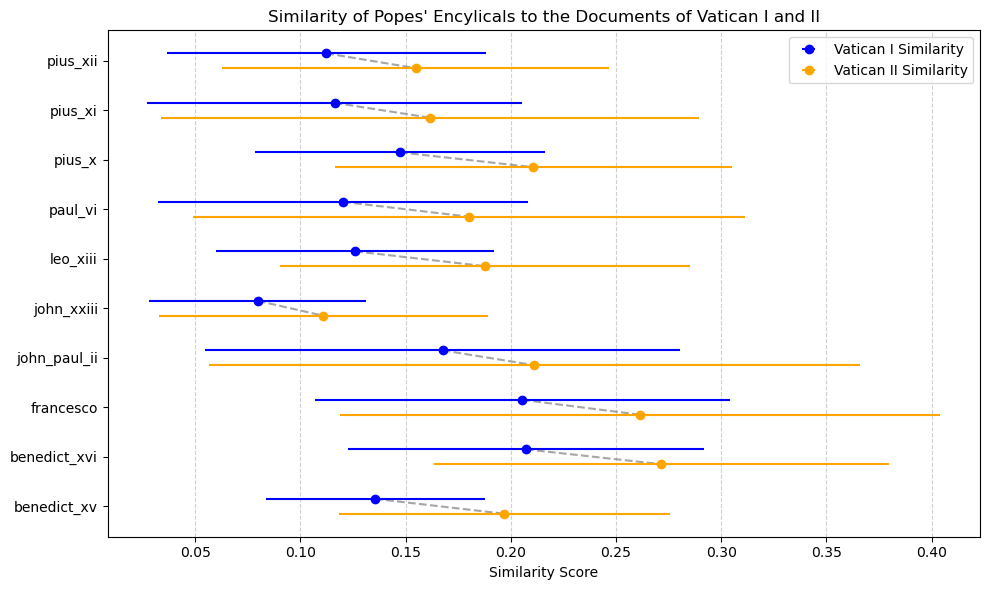

In [22]:
PlotCouncilEncyclicalSimilarityScore(PopeSimilarity)